In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %load import_set2.py
# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import os
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn에 있는 모델들
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2.3.6 결정 트리의 앙상블

**앙상블**ensemble은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다.  
(앙상블 모델이 분류와 회귀 문제의 다양한 dataset에서 효과적이라고 입증되었습니다.)  
**랜덤 포레스트**와 **그래디언트 부스팅** 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용합니다.

### 랜덤 포레스트 구축

1. RandomForestRegressor나 RandomForestClassfier의 n_estimators 매개변수로 생성할 트리의 개수를 정합니다.
2. 부트스트랩 샘플을 생성하여 n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출합니다.  
    -> 이러한 dataset은 워래의 dataset 크기와 같지만 어떤 데이터는 누락될 수도 있고 (대략 1/3 정도) 어떤 데이터는 중복될 수 있습니다.

**핵심 매개변수**는 max_features입니다.  
max_features 값이 커지면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰집니다.  
max_features 값이 낮아지면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 됩니다.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

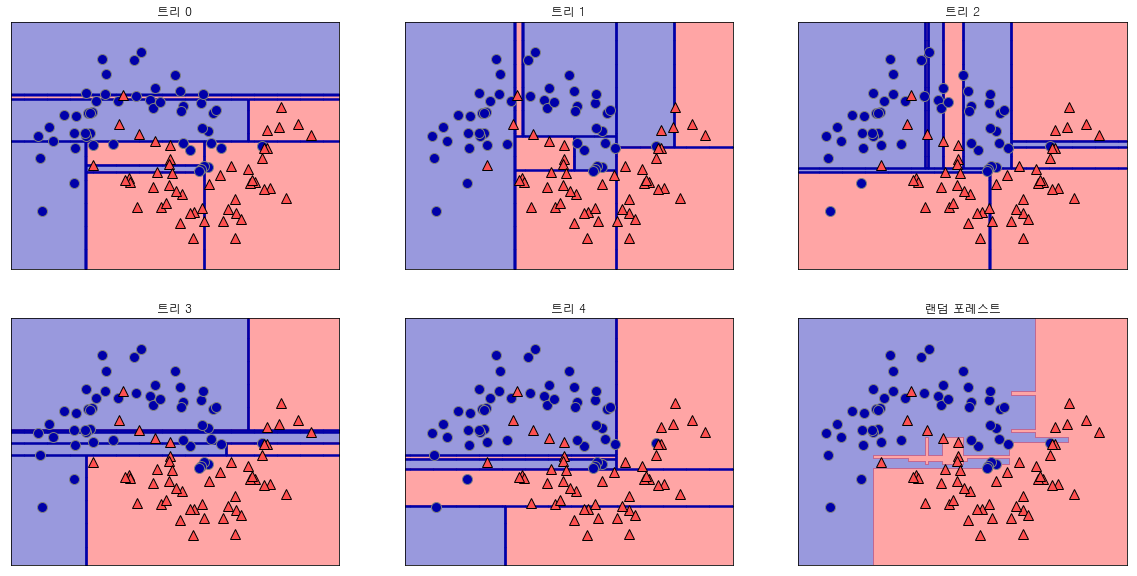

In [4]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show();

In [5]:
# 2.3.5장에서 정의한 plot_feature_importances_cancer 함수
cancer = load_breast_cancer()
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


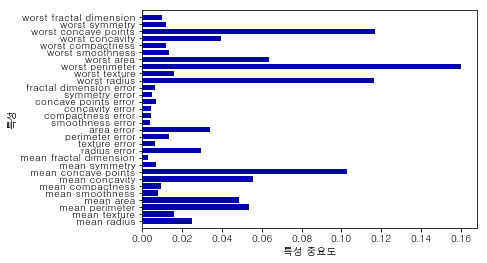

In [7]:
plot_feature_importances_cancer(forest)

### 장단점과 매개변수

회귀와 분류에 있어서 랜덤 포레스트는 가장 널리 사용되는 머신러닝 알고리즘!!  
성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없습니다

대량의 dataset에서 랜덤 포레스트 모델을 만들 때 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리할 수 있습니다.  
멀티 코어 프로세서일 때는 n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할 수 있습니다.  
n_jobs = -1로 지정하면 컴퓨터의 모든 코어를 사용합니다. (n_jobs의 기본값은 1)  

**유념할 점**  
다른 random_state를 지정하면(지정하지 않으면) 전혀 다른 모델이 만들어져서 이름 그대로 랜덤합니다.  
랜덤포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 적습니다.  
만약 같은 결과를 얻어야 한다면 random_state 값을 고정해야 합니다.

- 랜덤 포레스트는 텍스트 데이터와 같은 차원이 매우 높고 희소한 데이터에는 잘 작동하지 않습니다.  
    -> 선형 모델이 더 적합!  
- 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느립니다.  
    (속도와 메모리 사용에 제약이 있다면 선형 모델이 적합할 수 있습니다.)

**중요 매개변수**  
- n_estimators, max_features이고 max_depth와 같은 사전 가지치기 옵션이 있습니다.  
    1. n_estimators는 클수록 좋습니다. -> 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델이 됨  
        (**단!** 더 많은 트리는 더 많은 메모리와 긴 훈련시간으로 이어짐)  
    2. max_features는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 max_features는 과대적합을 줄여줍니다.  
        (일반적으로 기본값 사용하는 것이 좋은 방법)  
        **분류**는 max_features = sqrt(n_features), **회귀**는 max_features = n_features

### 그래디언트 부스팅 회귀 트리

회귀와 분류 모두 사용가능!

이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.  
-> 무작위성 없음  
(대신 강력한 사전 가지치기 사용)

얕은 트리같은 간단한 모델(약한 학습기)을 사용하므로 메모리를 적게 사용하고 예측도 빠릅니다.  
각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아집니다.

랜덤포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공해줍니다.

그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate입니다.  
학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만듭니다.  
n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도는 커지고 훈련 세트에서의 실수를 바로잡은 기회가 더 많아집니다.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


과대적합을 막기 위해 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있습니다.

In [9]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [10]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


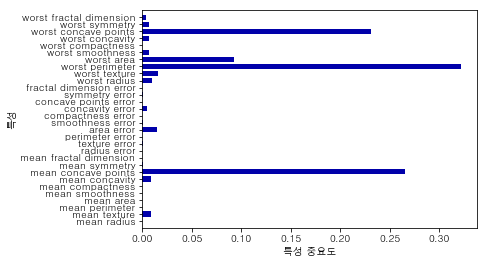

In [11]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

그래디언트 부스팅은 랜덤 포레스트와 비슷한 특성을 강조하고 있지만 일부 특성을 완전히 무시하고 있습니다.

### 장단점과 매개변수

**가장 큰 단점**  
매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 점  

**중요 매개변수**  
- 트리의 갯수를 지정하는 **n_estimators**와 이전 트리의 오차를 보정하는 정도를 조절하는 **learning_rate**입니다.  
    두 매개변수는 매우 깊게 연관되어 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 합니다.  
    랜덤 포레스트와 달리 n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아집니다.  
    (**best** 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 적절한 learning_rate를 찾는 것)  
- 각 트리의 복잡도를 낮추는 max_depth(또는 max_leaf_nodes)도 중요한 또다른 매개변수입니다.  
    (통상적으로 max_depth를 매우 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 합니다.)